In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## EDA

In [2]:
crosswalk_info = pd.read_csv("/content/CountyCrossWalk_Zillow.csv")
crosswalk_info

CountyName       StateName  StateFIPS  CountyFIPS MetroName_Zillow  \
0          Pike    Pennsylvania         42         103     New York, NY   
1         Bronx        New York         36           5     New York, NY   
2         Essex      New Jersey         34          13     New York, NY   
3         Kings        New York         36          47     New York, NY   
4         Ocean      New Jersey         34          29     New York, NY   
...         ...             ...        ...         ...              ...   
3139      Allen          Kansas         20           1              NaN   
3140      Anson  North Carolina         37           7              NaN   
3141      Atoka        Oklahoma         40           5              NaN   
3142      Avery  North Carolina         37          11              NaN   
3143      Bacon         Georgia         13           5              NaN   

                                   CBSAName  CountyRegionID_Zillow  \
0     New York-Newark-Jersey City, NY-NJ-PA                    280   
1     New York-Newark-Jersey City, NY-NJ-PA                    401   
2     New York-Newark-Jersey City, NY-NJ-PA                    504   
3     New York-Newark-Jersey City, NY-NJ-PA                    581   
4     New York-Newark-Jersey City, NY-NJ-PA                    659   
...                                     ...                    ...   
3139                                    NaN                    368   
3140                                    NaN                    374   
3141                                    NaN                    375   
3142                                    NaN                    376   
3143                                    NaN                    377   

      MetroRegionID_Zillow   FIPS  CBSACode  
0                 394913.0  42103   35620.0  
1                 394913.0  36005   35620.0  
2                 394913.0  34013   35620.0  
3                 394913.0  36047   35620.0  
4                 394913.0  34029   35620.0  
...                    ...    ...       ...  
3139                   NaN  20001       NaN  
3140                   NaN  37007       NaN  
3141                   NaN  40005       NaN  
3142                   NaN  37011       NaN  
3143                   NaN  13005       NaN  

[3144 rows x 10 columns]

## State level data

In [3]:
state_data = pd.read_csv("/content/State_time_series.csv")
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           13212 non-null  object 
 1   RegionName                                                     13212 non-null  object 
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64
 4   InventoryRaw_AllHomes                                          4896 non-null   float64
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64
 7   MedianListingPricePerSqft_3Bedroom                        

In [4]:
# state data with features for which we have at least 50% of observations
state_data_cleanish = state_data.loc[:,state_data.isna().sum().values / state_data.shape[0] < 0.50]
state_data_cleanish.isna().sum()

Date                                        0
RegionName                                  0
ZHVIPerSqft_AllHomes                      620
PctOfHomesDecreasingInValues_AllHomes    4292
PctOfHomesIncreasingInValues_AllHomes    4292
ZHVI_1bedroom                            2607
ZHVI_2bedroom                            1467
ZHVI_3bedroom                             425
ZHVI_4bedroom                             853
ZHVI_5BedroomOrMore                      1398
ZHVI_AllHomes                             774
ZHVI_BottomTier                           896
ZHVI_CondoCoop                           1530
ZHVI_MiddleTier                           774
ZHVI_SingleFamilyResidence                774
ZHVI_TopTier                              688
dtype: int64

In [5]:
#state_data_cleanish.groupby("RegionName").count()

# states with missing dates: Alaska (244), DistrictofColumbia (233), Montana (240), NorthDakota (159), UnitedStates (95), Wyoming (237)
idxs = state_data_cleanish.groupby("RegionName").filter(lambda x: x['Date'].count() >= 260)['RegionName']
state_data_cleanish = state_data_cleanish.loc[state_data_cleanish['RegionName'].isin(idxs)]
state_data_cleanish.groupby("RegionName").count()

Date  ZHVIPerSqft_AllHomes  \
RegionName                                  
Alabama         261                   261   
Arizona         261                   261   
Arkansas        261                   261   
California      261                   261   
Colorado        261                   261   
Connecticut     261                   261   
Delaware        261                   261   
Florida         261                   261   
Georgia         261                   261   
Hawaii          261                   261   
Idaho           261                   261   
Illinois        261                   261   
Indiana         261                   261   
Iowa            261                   261   
Kansas          261                     0   
Kentucky        261                   261   
Louisiana       261                   173   
Maine           261                   261   
Maryland        261                   261   
Massachusetts   261                   261   
Michigan        261                   261   
Minnesota       261                   261   
Mississippi     261                   261   
Missouri        261                   261   
Nebraska        261                   261   
Nevada          261                   261   
NewHampshire    261                   261   
NewJersey       261                   261   
NewMexico       261                   261   
NewYork         261                   125   
NorthCarolina   261                   261   
Ohio            261                   261   
Oklahoma        261                   261   
Oregon          261                   261   
Pennsylvania    261                   261   
RhodeIsland     261                   261   
SouthCarolina   261                   261   
SouthDakota     260                   260   
Tennessee       261                   261   
Texas           261                   251   
Utah            261                   261   
Vermont         260                   260   
Virginia        261                   261   
Washington      261                   261   
WestVirginia    261                   251   
Wisconsin       261                   261   

               PctOfHomesDecreasingInValues_AllHomes  \
RegionName                                             
Alabama                                          251   
Arizona                                          251   
Arkansas                                         251   
California                                       251   
Colorado                                         251   
Connecticut                                      251   
Delaware                                         251   
Florida                                          251   
Georgia                                          251   
Hawaii                                           251   
Idaho                                              0   
Illinois                                         251   
Indiana                                            0   
Iowa                                             251   
Kansas                                             0   
Kentucky                                         251   
Louisiana                                          0   
Maine                                            183   
Maryland                                         251   
Massachusetts                                    251   
Michigan                                         251   
Minnesota                                        251   
Mississippi                                        0   
Missouri                                           0   
Nebraska                                         251   
Nevada                                           251   
NewHampshire                                     251   
NewJersey                                        251   
NewMexico                                          0   
NewYork                                          251   
NorthCarolina                                    251   
Ohio  

In [6]:
state_data_cleanish.shape, state_data_cleanish.isnull().mean()

((12004, 16),
 Date                                     0.000000
 RegionName                               0.000000
 ZHVIPerSqft_AllHomes                     0.042069
 PctOfHomesDecreasingInValues_AllHomes    0.276325
 PctOfHomesIncreasingInValues_AllHomes    0.276325
 ZHVI_1bedroom                            0.174608
 ZHVI_2bedroom                            0.099300
 ZHVI_3bedroom                            0.006664
 ZHVI_4bedroom                            0.061480
 ZHVI_5BedroomOrMore                      0.089220
 ZHVI_AllHomes                            0.054898
 ZHVI_BottomTier                          0.065062
 ZHVI_CondoCoop                           0.117877
 ZHVI_MiddleTier                          0.054898
 ZHVI_SingleFamilyResidence               0.054898
 ZHVI_TopTier                             0.033239
 dtype: float64)

In [7]:
crosswalk_info['StateName'].unique()

array(['Pennsylvania', 'New York', 'New Jersey', 'California', 'Indiana',
       'Illinois', 'Wisconsin', 'Texas', 'Delaware', 'Maryland',
       'West Virginia', 'Virginia', 'District of Columbia', 'Florida',
       'Georgia', 'Massachusetts', 'New Hampshire', 'Michigan', 'Arizona',
       'Washington', 'Minnesota', 'Missouri', 'Colorado', 'Oregon',
       'South Carolina', 'North Carolina', 'Kentucky', 'Ohio', 'Kansas',
       'Nevada', 'Tennessee', 'Rhode Island', 'Arkansas', 'Mississippi',
       'Oklahoma', 'Connecticut', 'Louisiana', 'Alabama', 'Utah',
       'Hawaii', 'New Mexico', 'Nebraska', 'Iowa', 'Idaho', 'Maine',
       'Alaska', 'South Dakota', 'Vermont', 'North Dakota', 'Montana',
       'Wyoming'], dtype=object)

In [8]:
crosswalk_info = crosswalk_info.drop_duplicates(subset='StateName')

# Remove whitespaces and convert to lower case
state_data_cleanish['RegionName'] = state_data_cleanish['RegionName'].str.replace(' ', '').str.lower()
crosswalk_info.loc[:,'StateName'] = crosswalk_info['StateName'].str.replace(' ', '').str.lower()

# Now perform the merge
state_fips_data = pd.merge(state_data_cleanish, crosswalk_info[["StateName", "StateFIPS", "CountyRegionID_Zillow"]],
                     how='left', left_on='RegionName', right_on='StateName')
state_fips_data.head()

Date  RegionName  ZHVIPerSqft_AllHomes  \
0  1996-04-30     alabama                  50.0   
1  1996-04-30     arizona                  62.0   
2  1996-04-30    arkansas                  42.0   
3  1996-04-30  california                 102.0   
4  1996-04-30    colorado                  82.0   

   PctOfHomesDecreasingInValues_AllHomes  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   PctOfHomesIncreasingInValues_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  \
0                                    NaN        61500.0        48900.0   
1                                    NaN        59200.0        86400.0   
2                                    NaN        53000.0        54500.0   
3                                    NaN        93700.0       123400.0   
4                                    NaN        77800.0        97500.0   

   ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  \
0        78200.0       146500.0             206300.0        79500.0   
1        96100.0       128400.0             190500.0       103600.0   
2        76800.0       135100.0             186000.0        64400.0   
3       150900.0       196100.0             265300.0       157900.0   
4       129000.0       176100.0             212900.0       128100.0   

   ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  \
0          45600.0         99500.0          79500.0   
1          67100.0         78900.0         103600.0   
2          38400.0         70300.0          64400.0   
3          95100.0        136100.0         157900.0   
4          82700.0         99400.0         128100.0   

   ZHVI_SingleFamilyResidence  ZHVI_TopTier   StateName  StateFIPS  \
0                     79000.0      140200.0     alabama          1   
1                    107500.0      168700.0     arizona          4   
2                     64500.0      115200.0    arkansas          5   
3                    162000.0      270600.0  california          6   
4                    133600.0      209300.0    colorado          8   

   CountyRegionID_Zillow  
0                   1614  
1                   2402  
2                   2907  
3                   3101  
4                   1670

In [9]:
# "RegionName", "StateName", "CountyRegionID_Zillow" are useful for merging other datasets but useless for training given we have unique id StateFIPS
# so additional variables should be added prior to running this cell
training_data = state_fips_data.sort_values(by=['Date', 'StateFIPS']).drop(["RegionName", "CountyRegionID_Zillow"], axis=1)

training_data['Date'] = pd.to_datetime(training_data['Date'])

training_data.isnull().sum()

Date                                        0
ZHVIPerSqft_AllHomes                      505
PctOfHomesDecreasingInValues_AllHomes    3317
PctOfHomesIncreasingInValues_AllHomes    3317
ZHVI_1bedroom                            2096
ZHVI_2bedroom                            1192
ZHVI_3bedroom                              80
ZHVI_4bedroom                             738
ZHVI_5BedroomOrMore                      1071
ZHVI_AllHomes                             659
ZHVI_BottomTier                           781
ZHVI_CondoCoop                           1415
ZHVI_MiddleTier                           659
ZHVI_SingleFamilyResidence                659
ZHVI_TopTier                              399
StateName                                   0
StateFIPS                                   0
dtype: int64

In [10]:
# 1996 - 2017
training_data['Date'].head(1), training_data['Date'].tail(1)

(0   1996-04-30
 Name: Date, dtype: datetime64[ns],
 12003   2017-12-31
 Name: Date, dtype: datetime64[ns])

Group-based imputation to respect strata -> https://www.kdnuggets.com/2017/09/python-data-preparation-case-files-group-based-imputation.html

## Data preprocessing

- Imputation: Group based imputation to respect structure of panel dataset
- Standardization: Standard scaling for neural network training dataset
- Encoding:

In [11]:
# numeric features
# main concerns are multicollinearity ...
state_data_numeric = training_data.select_dtypes(include=['float64'])

<Axes: >

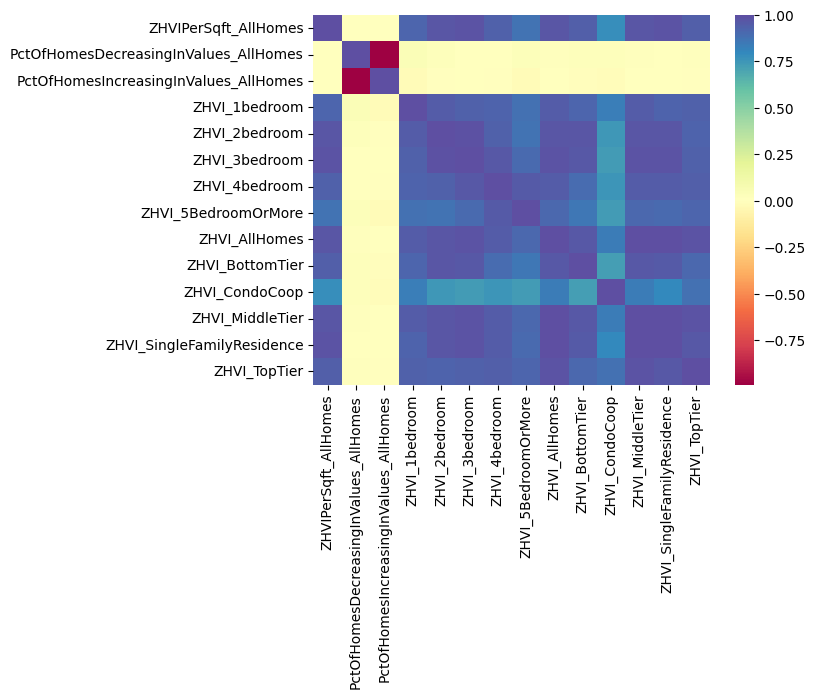

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(state_data_numeric.corr(), cmap="Spectral")

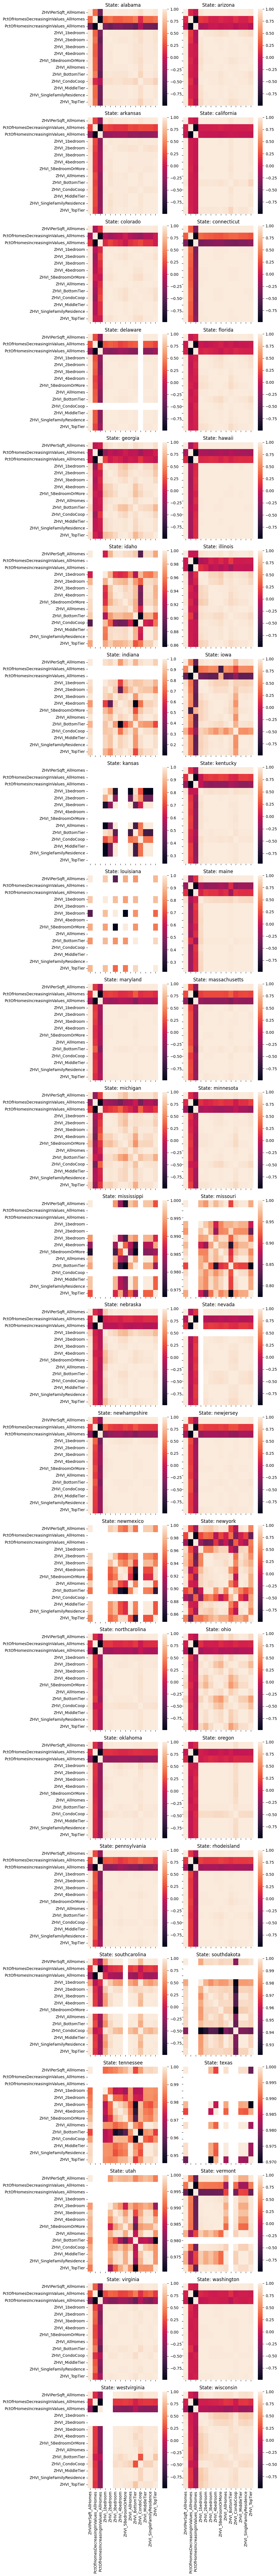

In [13]:
# Get the unique states
unique_states = training_data['StateName'].unique()

# Calculate the number of rows needed for the subplots
nrows = int(np.ceil(len(unique_states) / 2))

# Create a figure and axes with the right shape
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 4*nrows),
                        sharex=True, sharey=True)

# Flatten the axes so we can easily iterate over them
axs = axs.flatten()

for i, (name, group) in enumerate(training_data.groupby("StateName")):
    sns.heatmap(group.select_dtypes(include=['float64']).corr(), ax=axs[i], cbar=True)
    axs[i].set_title(f'State: {name}')

    # Only show y-labels for the first column
    if i % 2 != 0:
        axs[i].set_ylabel('')


# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


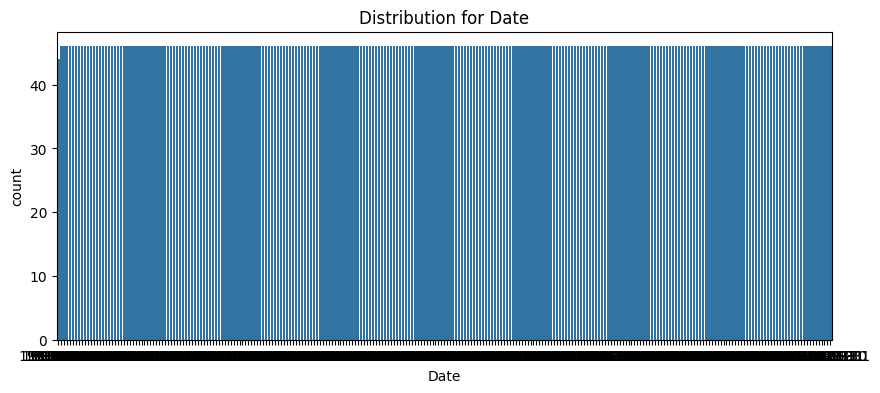

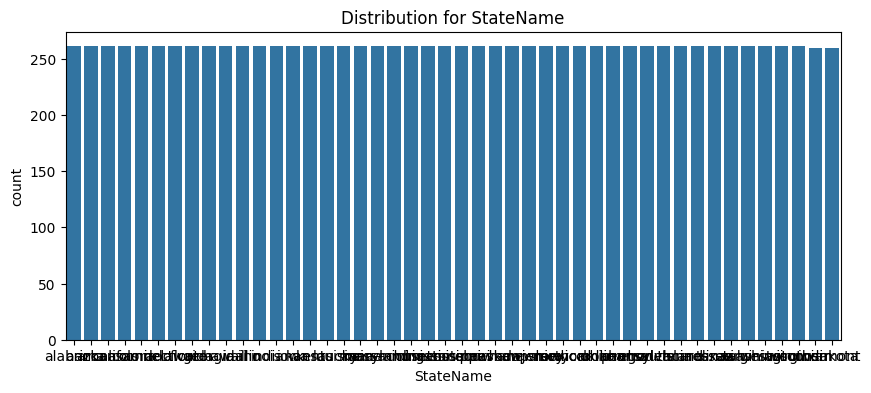

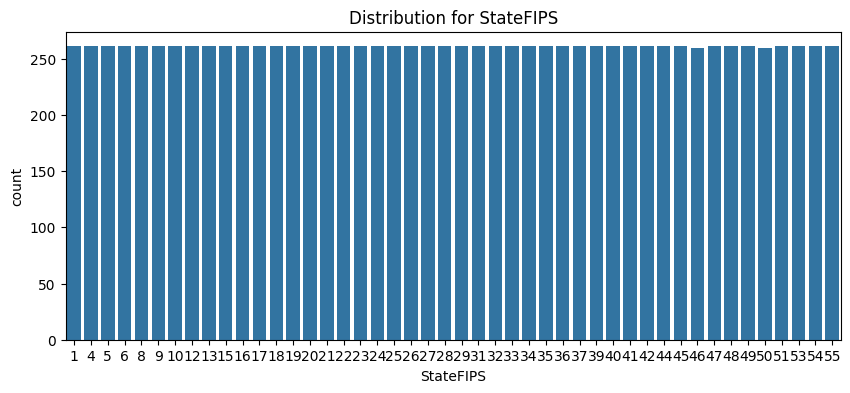

In [14]:
# categorical features
## main concern is balance
state_data_categorical = training_data.select_dtypes(exclude=['float64'])
for column in state_data_categorical:
    plt.figure(figsize=(10,4))
    sns.countplot(x=column, data=state_data_categorical)
    plt.title('Distribution for {}'.format(column))
    plt.show()

**Advantages of Group Based Imputation**

1. Maintains subgroup characteristics: It helps in retaining the statistical properties within each group, making the imputation more realistic and tailored.
2. Reduces bias: By using subgroup metrics for imputation, it avoids the bias that can occur when using overall metrics.
3. Improves accuracy: For heterogeneous data, group-based imputation can improve the accuracy of imputation by using more relevant baseline values.

In [15]:
# List of columns to be imputed
columns_to_impute = training_data.columns.drop(['Date', 'StateFIPS', 'StateName'])

# Apply the process to all columns
for column in columns_to_impute:
    training_data[column] = training_data.groupby('StateFIPS')[column].transform(lambda x: x.fillna(x.mean()))
    training_data[column] = training_data[column].round(2)

# some states seem to have all null values for some features or may not have enough data,
# these wouldn't get updated
training_data.isnull().sum()

Date                                        0
ZHVIPerSqft_AllHomes                      261
PctOfHomesDecreasingInValues_AllHomes    2870
PctOfHomesIncreasingInValues_AllHomes    2870
ZHVI_1bedroom                            1566
ZHVI_2bedroom                            1044
ZHVI_3bedroom                               0
ZHVI_4bedroom                             522
ZHVI_5BedroomOrMore                       783
ZHVI_AllHomes                             261
ZHVI_BottomTier                           521
ZHVI_CondoCoop                           1305
ZHVI_MiddleTier                           261
ZHVI_SingleFamilyResidence                261
ZHVI_TopTier                              261
StateName                                   0
StateFIPS                                   0
dtype: int64

In [16]:
# fill the reamining NANs with the global mean
for col in columns_to_impute:
    # Check if there are still missing values after group-wise imputation
    if training_data[col].isnull().any():
        # Apply a global mean or median imputation as a fallback
        global_mean = training_data[col].mean()
        training_data[col] = training_data[col].fillna(global_mean)
        training_data[col] = training_data[col].round(2)

training_data.isnull().sum()

Date                                     0
ZHVIPerSqft_AllHomes                     0
PctOfHomesDecreasingInValues_AllHomes    0
PctOfHomesIncreasingInValues_AllHomes    0
ZHVI_1bedroom                            0
ZHVI_2bedroom                            0
ZHVI_3bedroom                            0
ZHVI_4bedroom                            0
ZHVI_5BedroomOrMore                      0
ZHVI_AllHomes                            0
ZHVI_BottomTier                          0
ZHVI_CondoCoop                           0
ZHVI_MiddleTier                          0
ZHVI_SingleFamilyResidence               0
ZHVI_TopTier                             0
StateName                                0
StateFIPS                                0
dtype: int64

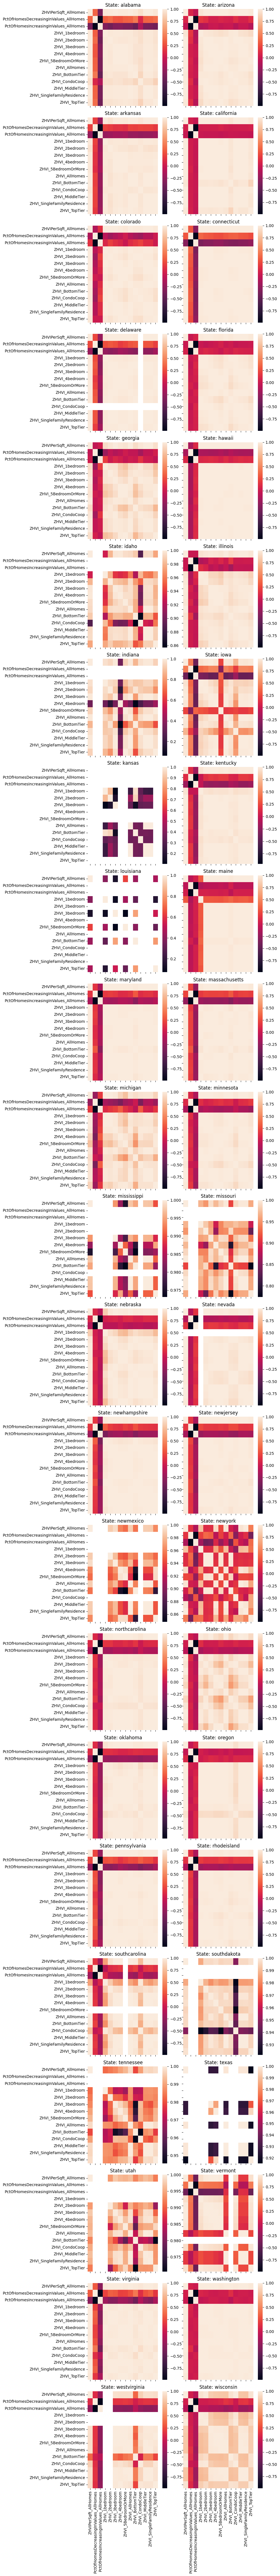

In [17]:
# Get the unique states
unique_states = training_data['StateName'].unique()

# Calculate the number of rows needed for the subplots
nrows = int(np.ceil(len(unique_states) / 2))

# Create a figure and axes with the right shape
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 4*nrows), sharex=True, sharey=True)

# Flatten the axes so we can easily iterate over them
axs = axs.flatten()

for i, (name, group) in enumerate(training_data.groupby("StateName")):
    sns.heatmap(group.select_dtypes(include=['float64']).corr(), ax=axs[i], cbar=True)
    axs[i].set_title(f'State: {name}')

    # Only show y-labels for the first column
    if i % 2 != 0:
        axs[i].set_ylabel('')

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### Scaling and Stardardization

Since tree models don't benefit from data transformations, I will work on a copy of the dataset meant to train the neural network.

In [18]:
training_data.drop("StateName", axis=1, inplace=True)

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'training_data' is pre-loaded with 'Date' and 'StateFIPS' among other features
grouped = training_data.groupby('StateFIPS')

scaled_features = pd.DataFrame()  # Empty DataFrame to store scaled features
scalers = {}  # Dictionary to store scalers for each group

feature_columns = training_data.drop(['Date', 'StateFIPS'], axis=1).columns

# Scale features within each group
for name, group in grouped:
    scaler = StandardScaler()
    scaled_group = scaler.fit_transform(group[feature_columns])
    scaled_features = pd.concat([
        scaled_features,
        pd.DataFrame(scaled_group, columns=feature_columns, index=group.index)
    ])
    scalers[name] = scaler  # Save the scaler for each group

# Encode StateFIPS
encoder = OneHotEncoder()
state_fips_encoded = encoder.fit_transform(training_data[['StateFIPS']]).toarray()
state_fips_encoded_df = pd.DataFrame(state_fips_encoded, columns=encoder.get_feature_names_out(['StateFIPS']))

# Combine scaled features, encoded StateFIPS, and other columns
nn_training_data = training_data[['Date', 'StateFIPS']].join(scaled_features).join(state_fips_encoded_df)
nn_training_data.head()

Date  StateFIPS  ZHVIPerSqft_AllHomes  \
0 1996-04-30          1             -1.768013   
1 1996-04-30          4             -1.460831   
2 1996-04-30          5             -1.708528   
3 1996-04-30          6             -1.618110   
4 1996-04-30          8             -1.830380   

   PctOfHomesDecreasingInValues_AllHomes  \
0                               0.000356   
1                              -0.000146   
2                              -0.000250   
3                               0.000146   
4                              -0.000113   

   PctOfHomesIncreasingInValues_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  \
0                              -0.000143      -1.565204      -1.955503   
1                               0.000107      -1.286640      -1.466429   
2                              -0.000364      -1.923031      -1.904331   
3                               0.000083      -1.575008      -1.586123   
4                               0.000190      -1.735943      -1.761501   

   ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ...  StateFIPS_45  \
0      -2.002246      -1.951488            -1.851074  ...           0.0   
1      -1.447063      -1.489534            -1.547257  ...           0.0   
2      -1.853083      -1.760701            -2.130150  ...           0.0   
3      -1.590005      -1.681274            -1.756584  ...           0.0   
4      -1.745656      -1.847353            -1.906292  ...           0.0   

   StateFIPS_46  StateFIPS_47  StateFIPS_48  StateFIPS_49  StateFIPS_50  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   StateFIPS_51  StateFIPS_53  StateFIPS_54  StateFIPS_55  
0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0  

[5 rows x 62 columns]

## Feature engineering

This project focuses on comparing performance of selected models between two cross validation training methods. Complex feature engineering complicates the interpretation of the models' predictions and thus I choose to only add date features. Future work could focus on extending the Zillow housing dataset to include economic variables, government statistics, and additional feature engineering.


In [20]:
training_data['Year'] = training_data['Date'].dt.year
training_data['Month'] = training_data['Date'].dt.month
training_data['Day'] = training_data['Date'].dt.day

training_data = training_data[['Date', 'StateFIPS']].join(training_data.drop(['Date', 'StateFIPS'], axis=1)).join(state_fips_encoded_df)
training_data.head()

Date  StateFIPS  ZHVIPerSqft_AllHomes  \
0 1996-04-30          1                  50.0   
1 1996-04-30          4                  62.0   
2 1996-04-30          5                  42.0   
3 1996-04-30          6                 102.0   
4 1996-04-30          8                  82.0   

   PctOfHomesDecreasingInValues_AllHomes  \
0                                  36.92   
1                                  32.07   
2                                  33.88   
3                                  29.72   
4                                  25.96   

   PctOfHomesIncreasingInValues_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  \
0                                  55.17        61500.0        48900.0   
1                                  62.52        59200.0        86400.0   
2                                  57.65        53000.0        54500.0   
3                                  65.62        93700.0       123400.0   
4                                  65.07        77800.0        97500.0   

   ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ...  StateFIPS_45  \
0        78200.0       146500.0             206300.0  ...           0.0   
1        96100.0       128400.0             190500.0  ...           0.0   
2        76800.0       135100.0             186000.0  ...           0.0   
3       150900.0       196100.0             265300.0  ...           0.0   
4       129000.0       176100.0             212900.0  ...           0.0   

   StateFIPS_46  StateFIPS_47  StateFIPS_48  StateFIPS_49  StateFIPS_50  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   StateFIPS_51  StateFIPS_53  StateFIPS_54  StateFIPS_55  
0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0  

[5 rows x 65 columns]

In [21]:
nn_training_data['Year'] = nn_training_data['Date'].dt.year
nn_training_data['Month'] = nn_training_data['Date'].dt.month
nn_training_data['Day'] = nn_training_data['Date'].dt.day

## Split data

I am dealing with a panel dataset, so I need split the data while taking the temporal unit into account to ensure disjoint and sequential sets.

In [22]:
# features and target for neural network
X_nn = nn_training_data.drop(columns=['ZHVIPerSqft_AllHomes'])  # drop target
y_nn = nn_training_data['ZHVIPerSqft_AllHomes']
groups_nn = nn_training_data['StateFIPS']

(X_nn.shape, X_nn.head()), (y_nn.shape, y_nn.head())

(((12004, 64),
          Date  StateFIPS  PctOfHomesDecreasingInValues_AllHomes  \
  0 1996-04-30          1                               0.000356   
  1 1996-04-30          4                              -0.000146   
  2 1996-04-30          5                              -0.000250   
  3 1996-04-30          6                               0.000146   
  4 1996-04-30          8                              -0.000113   
  
     PctOfHomesIncreasingInValues_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  \
  0                              -0.000143      -1.565204      -1.955503   
  1                               0.000107      -1.286640      -1.466429   
  2                              -0.000364      -1.923031      -1.904331   
  3                               0.000083      -1.575008      -1.586123   
  4                               0.000190      -1.735943      -1.761501   
  
     ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ...  \
  0      -2.002246      -1.951488    

In [23]:
# Separate features X and target y
X = training_data.drop(columns=['ZHVIPerSqft_AllHomes'])  # drop target
y = training_data['ZHVIPerSqft_AllHomes']
groups = training_data['StateFIPS']

(X.shape, X.head()), (y.shape, y.head())

(((12004, 64),
          Date  StateFIPS  PctOfHomesDecreasingInValues_AllHomes  \
  0 1996-04-30          1                                  36.92   
  1 1996-04-30          4                                  32.07   
  2 1996-04-30          5                                  33.88   
  3 1996-04-30          6                                  29.72   
  4 1996-04-30          8                                  25.96   
  
     PctOfHomesIncreasingInValues_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  \
  0                                  55.17        61500.0        48900.0   
  1                                  62.52        59200.0        86400.0   
  2                                  57.65        53000.0        54500.0   
  3                                  65.62        93700.0       123400.0   
  4                                  65.07        77800.0        97500.0   
  
     ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ...  \
  0        78200.0       146500.0    

https://www.kaggle.com/code/jorijnsmit/found-the-holy-grail-grouptimeseriessplit

In [24]:
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.utils.validation import _deprecate_positional_args

# https://github.com/getgaurav2/scikit-learn/blob/d4a3af5cc9da3a76f0266932644b884c99724c57/sklearn/model_selection/_split.py#L2243
class GroupTimeSeriesSplit(_BaseKFold):
    """Time Series cross-validator variant with non-overlapping groups.
    Provides train/test indices to split time series data samples
    that are observed at fixed time intervals according to a
    third-party provided group.
    In each split, test indices must be higher than before, and thus shuffling
    in cross validator is inappropriate.
    This cross-validation object is a variation of :class:`KFold`.
    In the kth split, it returns first k folds as train set and the
    (k+1)th fold as test set.
    The same group will not appear in two different folds (the number of
    distinct groups has to be at least equal to the number of folds).
    Note that unlike standard cross-validation methods, successive
    training sets are supersets of those that come before them.
    Read more in the :ref:`User Guide <cross_validation>`.
    Parameters
    ----------
    n_splits : int, default=5
        Number of splits. Must be at least 2.
    max_train_size : int, default=None
        Maximum size for a single training set.
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.model_selection import GroupTimeSeriesSplit
    >>> groups = np.array(['a', 'a', 'a', 'a', 'a', 'a',\
                           'b', 'b', 'b', 'b', 'b',\
                           'c', 'c', 'c', 'c',\
                           'd', 'd', 'd'])
    >>> gtss = GroupTimeSeriesSplit(n_splits=3)
    >>> for train_idx, test_idx in gtss.split(groups, groups=groups):
    ...     print("TRAIN:", train_idx, "TEST:", test_idx)
    ...     print("TRAIN GROUP:", groups[train_idx],\
                  "TEST GROUP:", groups[test_idx])
    TRAIN: [0, 1, 2, 3, 4, 5] TEST: [6, 7, 8, 9, 10]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a']\
    TEST GROUP: ['b' 'b' 'b' 'b' 'b']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] TEST: [11, 12, 13, 14]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b']\
    TEST GROUP: ['c' 'c' 'c' 'c']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]\
    TEST: [15, 16, 17]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c']\
    TEST GROUP: ['d' 'd' 'd']
    """
    @_deprecate_positional_args
    def __init__(self,
                 n_splits=5,
                 *,
                 max_train_size=None
                 ):
        super().__init__(n_splits, shuffle=False, random_state=None)
        self.max_train_size = max_train_size

    def split(self, X, y=None, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        groups : array-like of shape (n_samples,)
            Group labels for the samples used while splitting the dataset into
            train/test set.
        Yields
        ------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        """
        if groups is None:
            raise ValueError(
                "The 'groups' parameter should not be None")
        X, y, groups = indexable(X, y, groups)
        n_samples = _num_samples(X)
        n_splits = self.n_splits
        n_folds = n_splits + 1
        group_dict = {}
        u, ind = np.unique(groups, return_index=True)
        unique_groups = u[np.argsort(ind)]
        n_samples = _num_samples(X)
        n_groups = _num_samples(unique_groups)
        for idx in np.arange(n_samples):
            if (groups[idx] in group_dict):
                group_dict[groups[idx]].append(idx)
            else:
                group_dict[groups[idx]] = [idx]
        if n_folds > n_groups:
            raise ValueError(
                ("Cannot have number of folds={0} greater than"
                 " the number of groups={1}").format(n_folds,
                                                     n_groups))
        group_test_size = n_groups // n_folds
        group_test_starts = range(n_groups - n_splits * group_test_size,
                                  n_groups, group_test_size)
        for group_test_start in group_test_starts:
            train_array = []
            test_array = []
            for train_group_idx in unique_groups[:group_test_start]:
                train_array_tmp = group_dict[train_group_idx]
                train_array = np.sort(np.unique(
                                      np.concatenate((train_array,
                                                      train_array_tmp)),
                                      axis=None), axis=None)
            train_end = train_array.size
            if self.max_train_size and self.max_train_size < train_end:
                train_array = train_array[train_end -
                                          self.max_train_size:train_end]
            for test_group_idx in unique_groups[group_test_start:
                                                group_test_start +
                                                group_test_size]:
                test_array_tmp = group_dict[test_group_idx]
                test_array = np.sort(np.unique(
                                              np.concatenate((test_array,
                                                              test_array_tmp)),
                                     axis=None), axis=None)
            yield [int(i) for i in train_array], [int(i) for i in test_array]

In [25]:
panel_grouped_cv = GroupTimeSeriesSplit(n_splits=2)

X_array = X.drop(["Date", "StateFIPS"], axis=1).to_numpy()
y_array = y.to_numpy()
groups = X['StateFIPS'].values

In [26]:
X_array.shape, y_array.shape, groups.shape

((12004, 62), (12004,), (12004,))

## Cross-Validation (Panel split)

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [27]:
# double check panel is balanced
state_counts = X['StateFIPS'].value_counts()
state_counts

StateFIPS
1     261
4     261
32    261
33    261
34    261
35    261
36    261
37    261
39    261
40    261
41    261
42    261
44    261
45    261
47    261
48    261
49    261
51    261
53    261
54    261
55    261
31    261
29    261
28    261
27    261
5     261
6     261
8     261
9     261
10    261
12    261
13    261
15    261
16    261
17    261
18    261
19    261
20    261
21    261
22    261
23    261
24    261
25    261
26    261
46    260
50    260
Name: count, dtype: int64

In [28]:
import xgboost as xgb

from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming you have a model already defined, e.g., an XGBRegressor
model = xgb.XGBRegressor(max_depth=3)

state_scores = {state: [] for state in X['StateFIPS'].unique()}

i=1
for train_idx, test_idx in GroupTimeSeriesSplit(n_splits=3).split(X, y, groups=X['StateFIPS']):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    state_fips_train = X['StateFIPS'].iloc[train_idx]
    state_fips_test = X['StateFIPS'].iloc[test_idx]  # State identifiers for the test set

    print(f"\nSplit {i}")
    print(f"X train: {X_train.shape},\t X test: {X_test.shape},\nY train: {y_train.shape},\t Y test: {y_test.shape}")

    print("States in train set:", state_fips_train.unique())
    print("States in test set:", state_fips_test.unique())

    model.fit(X_train.drop(['Date', 'StateFIPS'], axis=1), y_train)
    y_pred = model.predict(X_test.drop(['Date', 'StateFIPS'], axis=1))

    for state in X['StateFIPS'].unique():
        state_mask = (state_fips_test == state)
        if np.any(state_mask):
            mse = mean_squared_error(y_test[state_mask], y_pred[state_mask])
            state_scores[state].append(mse)
    i += 1

# Average MSE for each state, handling empty cases
average_state_scores = {state: np.mean(scores) if scores else "Not in test set" for state, scores in state_scores.items()}
average_state_scores


Split 1
X train: (3393, 64),	 X test: (2871, 64),
Y train: (3393,),	 Y test: (2871,)
States in train set: [ 1  4  5  6  8  9 10 12 13 15 16 17 18]
States in test set: [19 20 21 22 23 24 25 26 27 28 29]

Split 2
X train: (6264, 64),	 X test: (2871, 64),
Y train: (6264,),	 Y test: (2871,)
States in train set: [ 1  4  5  6  8  9 10 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
States in test set: [31 32 33 34 35 36 37 39 40 41 42]

Split 3
X train: (9135, 64),	 X test: (2869, 64),
Y train: (9135,),	 Y test: (2869,)
States in train set: [ 1  4  5  6  8  9 10 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 31 32 33 34 35 36 37 39 40 41 42]
States in test set: [44 45 47 48 49 51 53 54 55 46 50]


{1: 'Not in test set',
 4: 'Not in test set',
 5: 'Not in test set',
 6: 'Not in test set',
 8: 'Not in test set',
 9: 'Not in test set',
 10: 'Not in test set',
 12: 'Not in test set',
 13: 'Not in test set',
 15: 'Not in test set',
 16: 'Not in test set',
 17: 'Not in test set',
 18: 'Not in test set',
 19: 356.2439276508835,
 20: 1469.3670407873137,
 21: 49.59329946099302,
 22: 75.43510160945492,
 23: 49.3748972015074,
 24: 39.51945802928738,
 25: 40.912709183794924,
 26: 103.5224186911383,
 27: 598.6964255639178,
 28: 181.88558579103673,
 29: 101.50018142291503,
 31: 31.52039828934664,
 32: 41.858399833152895,
 33: 128.1826685570712,
 34: 88.90395152487126,
 35: 73.0927754037307,
 36: 1017.2368249722867,
 37: 44.55172400009468,
 39: 11.367470205821204,
 40: 29.86018610842001,
 41: 26.212937401455758,
 42: 29.801679369365825,
 44: 148.99632523042195,
 45: 113.90442828302889,
 47: 39.55605498535052,
 48: 134.177034397206,
 49: 343.1365082602532,
 51: 211.07694879837933,
 53: 115.6642

**Benefits of Panel Split**

Avoiding Data Leakage:

- The group-based splitting ensures that the same group (state) does not appear in both the training and test sets, which is important when you want to evaluate a model’s ability to generalize to new groups.
- This approach also respects the temporal aspect of the data, ensuring that future data is not used to train the model for past predictions.

Respecting Temporal Integrity:

- Ensuring that the test set contains only later time periods compared to the training set mirrors real-world forecasting scenarios, where you want to predict future outcomes based on past data.

**Trade-offs and Challenges**

Curse of Dimensionality:

- The curse of dimensionality refers to the phenomenon where the feature space becomes increasingly sparse as the number of features grows, leading to challenges in model training.
- In panel data settings, splitting by group and time can result in small and potentially non-representative training and test sets if the number of groups or the amount of data per group is limited.

Limited Data in Each Set:

- With many groups and time periods, each split might end up with relatively small subsets of data for training and testing, which can reduce the robustness and reliability of the cross-validation results.
- Small datasets can lead to unstable model training and evaluation, as the performance might vary significantly with small changes in the data.

The panel split is promising, and much more realistic for making statistical inference afterwards, but we face clear obstacles given the size of the state-level data. Future work should consider larger datasets to evaluate this cross validation generator.

For now, given this limitations. I will evaluate Linear Regression, XGBoost, and a Decision Tree with the custom CV generator and Sklearn's default generator to compare performance scores.

In [29]:
def fit_gridsearchCV(X, y, groups,
                     estimator, cv_generator,
                     param_grid, scoring):

    gsearch = GridSearchCV(estimator=estimator,
                       cv=cv_generator,
                       param_grid=param_grid,
                       scoring=scoring)

    gsearch.fit(X, y, groups=groups)

    print("Best Parameters:", gsearch.best_params_)
    print("Best MSE:", -gsearch.best_score_)

    return gsearch.best_estimator_, gsearch.best_score_

In [30]:
from sklearn.model_selection import LearningCurveDisplay

def plot_learningCurve(X, y, groups,
                       tuned_model, cv_generator):

    fig, ax = plt.subplots(figsize=(6, 6))

    common_params = {
        "X": X,  # features array
        "y": y,  # target array
        "groups": groups,  # group identifier array
        "cv": cv_generator,
        "score_type": "both",
        "n_jobs": 4,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "MSE",
    }


    LearningCurveDisplay.from_estimator(tuned_model, **common_params, ax=ax)

    ax.legend(["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {type(tuned_model).__name__}")

Best Parameters: {}
Best MSE: 135.75046047996477


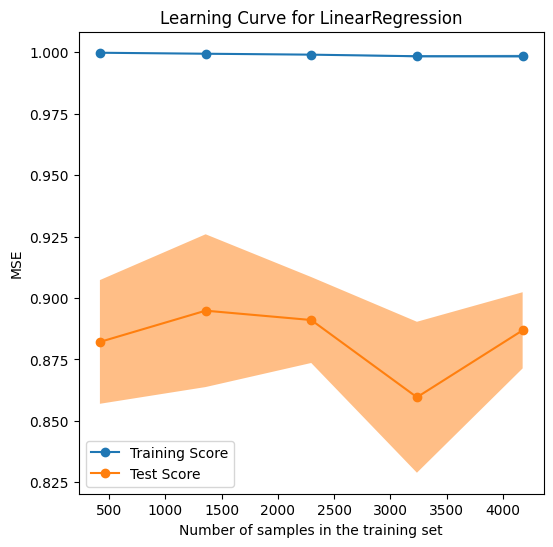

In [31]:
from sklearn.linear_model import LinearRegression

base_lr_model = LinearRegression()
param_search = {}

# custom panel cv split
fit_lr_panel, _ = fit_gridsearchCV(X_array, y_array, groups,
                                   base_lr_model, panel_grouped_cv,
                                   param_search, "neg_mean_squared_error")

# no hyperparameter tuning for Linear Regression so we use the base model again
plot_learningCurve(X_array, y_array, groups,
                  fit_lr_panel, panel_grouped_cv)

Best Parameters: {}
Best MSE: 17.32182192430397


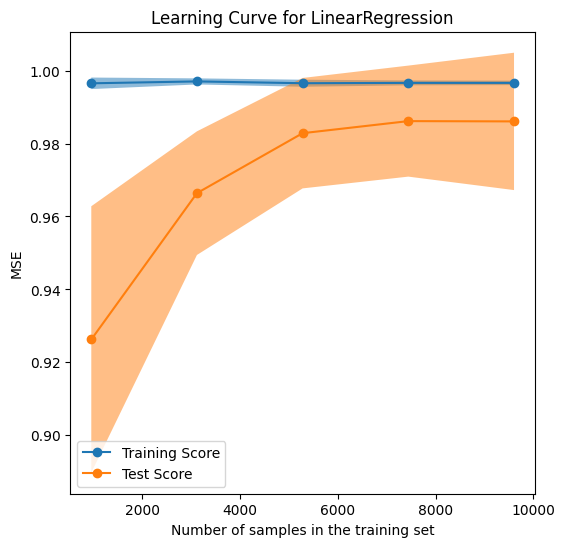

In [32]:
base_lr_model = LinearRegression()
param_search = {}

# sklearn cv split
fit_lr, _ = fit_gridsearchCV(X_array, y_array, groups,
                             base_lr_model, 5,
                             param_search, "neg_mean_squared_error")

# no hyperparameter tuning for Linear Regression so we use the base model again
plot_learningCurve(X_array, y_array, groups,
                  fit_lr, 5)

Best Parameters: {'max_depth': 5, 'n_estimators': 30}
Best MSE: 118.3895344493057


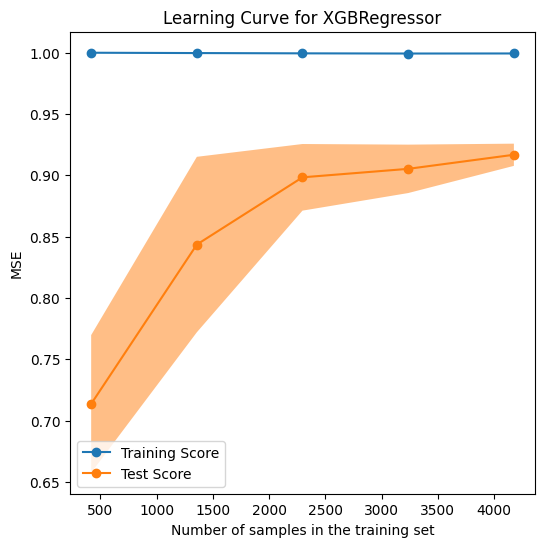

In [33]:
base_xgb_model = xgb.XGBRegressor()
param_search = {'n_estimators' : [10, 20, 30],
                'max_depth' : [3, 5, 7]}

# custom panel cv split
tuned_panel_xgb_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_xgb_model, panel_grouped_cv,
                                           param_search, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_panel_xgb_model, panel_grouped_cv)

Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best MSE: 40.810953466791304


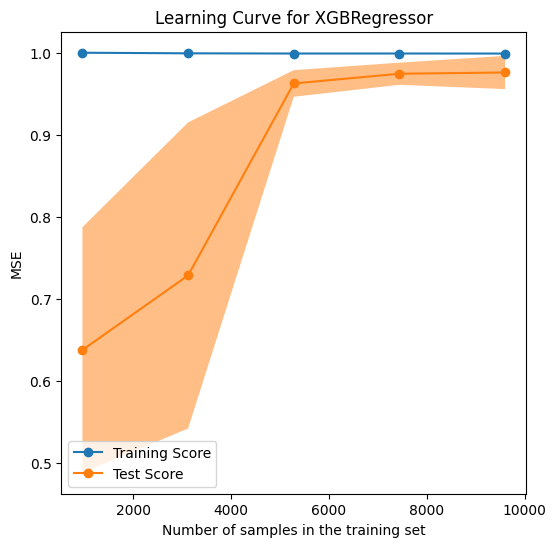

In [34]:
base_xgb_model = xgb.XGBRegressor()
param_search = {'n_estimators' : [10, 20, 30, 50],
                'max_depth' : [3, 5, 7]}

# sklearn cv split
tuned_xgb_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_xgb_model, 5,
                                           param_search, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_xgb_model, 5)

Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best MSE: 175.7097733483198


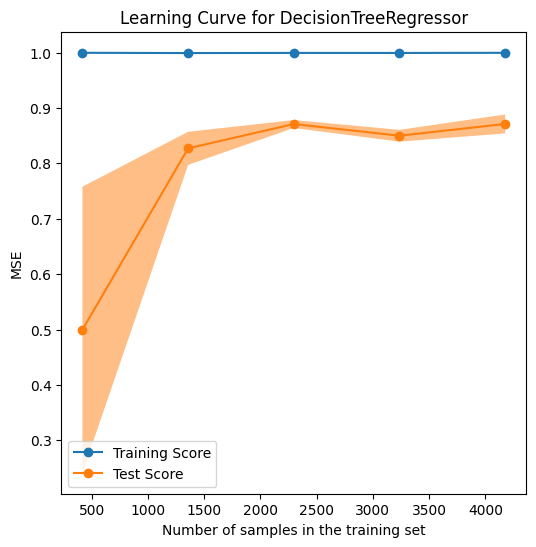

In [35]:
from sklearn.tree import DecisionTreeRegressor

base_dtree_model = DecisionTreeRegressor(random_state=42)
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20]
}

# custom panel cv split
tuned_panel_dtree_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_dtree_model, panel_grouped_cv,
                                           param_dist, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_panel_dtree_model, panel_grouped_cv)

Best Parameters: {'max_depth': 20, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best MSE: 67.83457930776972


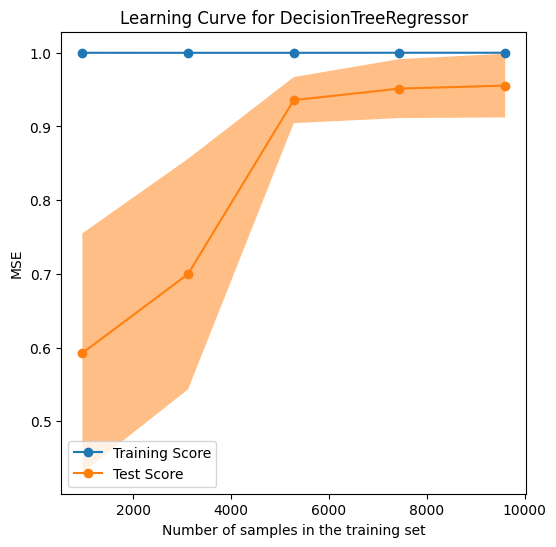

In [36]:
base_dtree_model = DecisionTreeRegressor(random_state=42)
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20]
}

# sklearn cv split
tuned_dtree_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_dtree_model, 5,
                                           param_dist, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_dtree_model, 5)

## Neural Network

I wonder if it makes sense to apply the panel split to neural networks. These are inherently hard to interpret, as we can see from the results below the fit is much more accurate for prediction than any other model. The trade-off here is interpretability for accuracy, does a more mindful data processing help give some meaning to the neural network predictions? Or should I simply use NNs as universal estimators without much thought into the meaning of the features?

In [37]:
y_nn.min(), y_nn.max()

(-3.6357475243446484, 3.9722034226912886)

In [38]:
X_nn.describe()

Date     StateFIPS  \
count                          12004  12004.000000   
mean   2007-03-01 23:32:53.342219264     29.127291   
min              1996-04-30 00:00:00      1.000000   
25%              2001-09-30 00:00:00     17.000000   
50%              2007-02-28 00:00:00     28.000000   
75%              2012-07-31 00:00:00     42.000000   
max              2017-12-31 00:00:00     55.000000   
std                              NaN     15.229494   

       PctOfHomesDecreasingInValues_AllHomes  \
count                           12004.000000   
mean                                0.000000   
min                                -3.365843   
25%                                -0.609334   
50%                                 0.000000   
75%                                 0.153670   
max                                 3.505547   
std                                 0.872340   

       PctOfHomesIncreasingInValues_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  \
count                           1.200400e+04   1.200400e+04   1.200400e+04   
mean                            3.314761e-17  -3.797049e-12   3.796709e-12   
min                            -3.202336e+00  -3.053003e+00  -2.586746e+00   
25%                            -2.215098e-01  -6.059850e-01  -7.003908e-01   
50%                             0.000000e+00  -2.910383e-11   4.365575e-11   
75%                             5.936645e-01   5.861227e-01   6.508781e-01   
max                             3.355428e+00   6.097121e+00   4.127481e+00   
std                             8.723396e-01   9.325320e-01   9.555653e-01   

       ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ...  \
count   12004.000000   1.200400e+04         1.200400e+04   1.200400e+04  ...   
mean        0.000000   3.788298e-17         3.796822e-12  -6.329489e-13  ...   
min        -2.549944  -2.448135e+00        -2.555410e+00  -2.599142e+00  ...   
25%        -0.815212  -7.553724e-01        -7.062708e-01  -7.758933e-01  ...   
50%         0.187380   1.171363e-01         1.019495e-01   7.795526e-02  ...   
75%         0.740549   7.126155e-01         6.958953e-01   7.175698e-01  ...   
max         2.733750   3.361874e+00         3.301143e+00   3.677840e+00  ...   
std         1.000042   9.780563e-01         9.668762e-01   9.891101e-01  ...   

       StateFIPS_48  StateFIPS_49  StateFIPS_50  StateFIPS_51  StateFIPS_53  \
count  12004.000000  12004.000000  12004.000000  12004.000000  12004.000000   
mean       0.021743      0.021743      0.021659      0.021743      0.021743   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   
std        0.145848      0.145848      0.145575      0.145848      0.145848   

       StateFIPS_54  StateFIPS_55          Year         Month           Day  
count  12004.000000  12004.000000  12004.000000  12004.000000  12004.000000  
mean       0.021743      0.021743   2006.622459      6.552149     30.440686  
min        0.000000      0.000000   1996.000000      1.000000     28.000000  
25%        0.000000      0.000000   2001.000000      4.000000     30.000000  
50%        0.000000      0.000000   2007.000000      7.000000     31.000000  
75%        0.000000      0.000000   2012.000000     10.000000     31.000000  
max        1.000000      1.000000   2017.000000     12.000000     31.000000  
std        0.145848      0.145848      6.278686      3.436919      0.807920  

[8 rows x 64 columns]

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# X_nn and y_nn are the scaled features and target respectively
X_train, X_test, y_train, y_test = train_test_split(X_nn.drop(['Date'], axis=1), y_nn,
                                                    test_size=0.2, random_state=42)

# Print shapes of the datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

# Creating the model
tanh_model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='tanh'),  # First hidden layer
    Dense(64, activation='tanh'),  # Second hidden layer
    Dense(32, activation='tanh'),  # Third hidden layer
    Dense(1)  # Output layer
])

# Compile the model
tanh_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Fit the model
history = tanh_model.fit(X_train, y_train, epochs=50,
                         batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mse = tanh_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)

Training set shape: (9603, 63)
Test set shape: (2401, 63)
Training labels shape: (9603,)
Test labels shape: (2401,)
Epoch 1/50
481/481 [==============================] - 2s 3ms/step - loss: 1.0108 - mse: 1.0108 - val_loss: 0.9714 - val_mse: 0.9714
Epoch 2/50
481/481 [==============================] - 1s 2ms/step - loss: 0.9996 - mse: 0.9996 - val_loss: 0.9813 - val_mse: 0.9813
Epoch 3/50
481/481 [==============================] - 1s 2ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 0.9704 - val_mse: 0.9704
Epoch 4/50
481/481 [==============================] - 1s 2ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 0.9701 - val_mse: 0.9701
Epoch 5/50
481/481 [==============================] - 1s 2ms/step - loss: 0.9981 - mse: 0.9981 - val_loss: 0.9710 - val_mse: 0.9710
Epoch 6/50
481/481 [==============================] - 2s 3ms/step - loss: 0.9952 - mse: 0.9952 - val_loss: 0.9701 - val_mse: 0.9701
Epoch 7/50
481/481 [==============================] - 2s 4ms/step - loss: 0.9949 - mse: 0.99

In [40]:
X_test.head()

StateFIPS  PctOfHomesDecreasingInValues_AllHomes  \
7740         20                               0.000000   
9702         54                               0.605780   
9350         20                               0.000000   
7872         13                               1.711454   
360          49                               0.000000   

      PctOfHomesIncreasingInValues_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  \
7740                               0.000000  -9.870669e-01  -8.787980e-01   
9702                              -0.850994  -2.910383e-11   4.365575e-11   
9350                               0.000000  -9.040152e-01  -1.230802e+00   
7872                              -1.731755  -3.208113e-01   4.726928e-02   
360                                0.000000  -2.910383e-11  -1.543444e+00   

      ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  \
7740       0.858375       0.000000         5.820766e-11       0.090993   
9702       0.960434       0.919741         9.726505e-01       0.995291   
9350       0.260657       0.000000         5.820766e-11      -1.702431   
7872      -0.062318      -0.058903         4.244549e-02       0.013255   
360       -1.553763      -1.540593        -1.568148e+00      -1.569024   

      ZHVI_BottomTier  ...  StateFIPS_48  StateFIPS_49  StateFIPS_50  \
7740        -1.025752  ...           0.0           0.0           0.0   
9702         0.559300  ...           0.0           0.0           0.0   
9350        -0.810772  ...           0.0           0.0           0.0   
7872         0.113312  ...           0.0           0.0           0.0   
360         -1.587715  ...           0.0           1.0           0.0   

      StateFIPS_51  StateFIPS_53  StateFIPS_54  StateFIPS_55  Year  Month  Day  
7740           0.0           0.0           0.0           0.0  2010      4   30  
9702           0.0           0.0           1.0           0.0  2013     10   31  
9350           0.0           0.0           0.0           0.0  2013      3   31  
7872           0.0           0.0           0.0           0.0  2010      7   31  
360            0.0           0.0           0.0           0.0  1996     11   30  

[5 rows x 63 columns]

In [41]:
# Predict and invert scaling
predictions_scaled = tanh_model.predict(X_test)
predictions_original = pd.DataFrame()  # DataFrame to store original scale predictions

for state, scaler in scalers.items():
    # Filter the scaled predictions by state
    state_mask = X_test['StateFIPS'] == state  # Assuming test_data has 'StateFIPS'
    state_predictions_scaled = predictions_scaled[state_mask]

    # Inverse transform the predictions
    state_predictions_original = scaler.inverse_transform(state_predictions_scaled)

    # Store in DataFrame
    predictions_original = pd.concat([
        predictions_original,
        pd.DataFrame(state_predictions_original, index=state_mask.index)
    ])

# Calculate MSE on original scale
mse_original = mean_squared_error(X_test['actuals'], predictions_original)
print("MSE on Original Scale:", mse_original)


76/76 [==============================] - 0s 2ms/step


ValueError: non-broadcastable output operand with shape (49,1) doesn't match the broadcast shape (49,14)

In [ ]:
# Assuming you have 'predictions_original' and 'mse_original' computed as in previous examples

plt.figure(figsize=(15, 5))

# Plotting training history (scaled MSE)
plt.subplot(1, 3, 1)
plt.plot(history.history['mse'], label='Train MSE (Scaled)')
plt.plot(history.history['val_mse'], label='Validation MSE (Scaled)')
plt.title('MSE Over Epochs (Scaled)')
plt.xlabel('Epochs')
plt.ylabel('MSE (Scaled)')
plt.legend()

# Plotting MSE on original scale
plt.subplot(1, 3, 2)
plt.bar(['Test MSE (Original Scale)'], [mse_original])
plt.title('MSE on Original Scale')
plt.ylabel('MSE (Original Units)')

# Comparison of scaled vs. original MSE values
plt.subplot(1, 3, 3)
plt.plot(history.history['val_mse'], label='Validation MSE (Scaled)')
plt.axhline(y=mse_original, color='r', linestyle='-', label='Test MSE (Original Scale)')
plt.title('Comparison of Scaled and Original MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Creating the model
relu_model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer
])

# Compile the model
relu_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='mean_squared_error', metrics=['mse'])

# Fit the model
history = relu_model.fit(X_train, y_train, epochs=50,
                    batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mse = relu_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE Over Epochs')
plt.legend()

plt.show()

## GPU optimization (to do)

In [ ]:
!nvidia-smi

In [ ]:
import sys
!rsync -ah --progress ../input/rapids/rapids.0.14.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.7"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path
!rsync -ah --progress /opt/conda/envs/rapids/lib/libxgboost.so /opt/conda/lib/